In [ ]:
!pip install poetry
!pip install ray
!pip install tensorboardX

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = 'drive/My Drive/DL project'
import sys
sys.path.append(drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [ ]:
modelName = 'Ren_conv'
import datetime
import getpass
import json
import os
import pathlib
from shutil import copyfile

import torch
from sklearn.preprocessing import StandardScaler
from torch.autograd import Variable
from config_Ren_conv import code_path, data_path, figure_path, model_path
from src.data import DataframeDataLoader
from src.evaluation_Ren_conv import evaluateModel
from src.load_data import dataLoader
from src.models.Ren_conv import DilatedNet
from src.parameter_sets.par import *
from src.tools_Ren_conv import train_cgm

from optimizeHypers_Ren_conv import searchBestHypers, test_rmse

In [ ]:
from src.evaluation_Ren_conv import evaluateModel
from pathlib import Path

In [ ]:
# %load_ext autoreload
# %autoreload 2

# Paths to data, code, figures, etc. should be set in config.py.
# Initialize the config.py file by copying from config.template.py.
# ---------------------------------------------------------------------
# DEFINE MODEL, PARAMETERS AND DATA
# - Change <par> to the name of file containing your parameters
# - Change <hediaNet> to the name of file containing your model architecture and DilatedNet to the name
#   of your model. Also change in train_cgm and optmizeHypers.py
# ---------------------------------------------------------------------


# Tensorboard log setup
# Create a directory for the model if it doesn't already exist
current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
user = getpass.getuser()
model_id = f'id_{current_time}_{user}'
model_path_id = model_path / model_id
model_path_id.mkdir(exist_ok=True, parents=True)
model_figure_path = figure_path / model_id
model_figure_path.mkdir(exist_ok=True, parents=True)





In [ ]:

# ---------------------------------------------------------------------
# DEFINE DATA
# ---------------------------------------------------------------------
# Define data object
data_pars = {}
data_pars['path'] = data_path
data_pars['train_data'] = train_data
data_pars['test_data'] = test_data
data_pars['validation_data'] = val_data

data_pars['start_date_train'] = start_date_train
data_pars['start_date_test'] = start_date_test
data_pars['start_date_validation'] = start_date_val

data_pars['end_date_train'] = end_date_train
data_pars['end_date_test'] = end_date_test
data_pars['end_date_validation'] = end_date_val


data_obj = dataLoader(data_pars, features, n_steps_past=16,
                      n_steps_future=6,
                      allowed_gap=10,
                      scaler=StandardScaler())


Optimize hyperparameters

In [ ]:
import os
os.chdir('/content/drive/My Drive/DL project/')

In [ ]:
#searchBestHypers(num_samples=50, max_num_epochs=30, n_epochs_stop=10, grace_period=5, gpus_per_trial=0,data_obj=data_obj)

2020-12-29 21:05:23,849	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2020-12-29 21:05:26,835	WARNING experiment.py:285 -- No name detected on trainable. Using DEFAULT.
2020-12-29 21:05:26,839	INFO registry.py:65 -- Detected unknown callable for trainable. Converting to class.


== Status ==
Memory usage on this node: 1.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 1/2 CPUs, 0/1 GPUs, 0.0/7.18 GiB heap, 0.0/2.49 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2020-12-29_21-05-26
Number of trials: 1/50 (1 RUNNING)
+---------------------+----------+-------+--------------+------+------+-----------+-----------+
| Trial name          | status   | loc   |   batch_size |   h1 |   h2 |        lr |        wd |
|---------------------+----------+-------+--------------+------+------+-----------+-----------|
| DEFAULT_93288_00000 | RUNNING  |       |           16 |    8 |   16 | 0.0117011 | 0.0775457 |
+---------------------+----------+-------+--------------+------+------+-----------+-----------+


Result for DEFAULT_93288_00000:
  date: 2020-12-29_21-05-41
  done: false
  experiment_id: 52c5522ef73b4f66950e5b810fce39

2020-12-29 21:07:45,139	WARNING worker.py:1034 -- The actor or task with ID ffffffffffffffffd24da3c301000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {accelerator_type:T4: 1.000000}, {node:172.28.0.2: 1.000000}, {GPU: 1.000000}, {object_store_memory: 2.490234 GiB}, {memory: 7.177734 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


Result for DEFAULT_93288_00000:
  date: 2020-12-29_21-07-47
  done: false
  experiment_id: 52c5522ef73b4f66950e5b810fce392b
  hostname: db628bba8035
  iterations_since_restore: 12
  loss: 210.08497960912356
  node_ip: 172.28.0.2
  pid: 395
  should_checkpoint: true
  time_since_restore: 138.69346475601196
  time_this_iter_s: 11.926904439926147
  time_total_s: 138.69346475601196
  timestamp: 1609276067
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: '93288_00000'
  
Result for DEFAULT_93288_00000:
  date: 2020-12-29_21-07-58
  done: false
  experiment_id: 52c5522ef73b4f66950e5b810fce392b
  hostname: db628bba8035
  iterations_since_restore: 13
  loss: 210.12307626796218
  node_ip: 172.28.0.2
  pid: 395
  should_checkpoint: true
  time_since_restore: 150.00477027893066
  time_this_iter_s: 11.311305522918701
  time_total_s: 150.00477027893066
  timestamp: 1609276078
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: '93288_00000'
  
== Status ==
Memory usag

2020-12-29 21:17:15,900	WARNING worker.py:1034 -- The actor or task with ID ffffffffffffffff1211da1301000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {accelerator_type:T4: 1.000000}, {node:172.28.0.2: 1.000000}, {GPU: 1.000000}, {object_store_memory: 2.490234 GiB}, {memory: 7.177734 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


Result for DEFAULT_93288_00011:
  date: 2020-12-29_21-17-42
  done: true
  experiment_id: e03c925175504a80913127388e06a644
  hostname: db628bba8035
  iterations_since_restore: 1
  loss: 259.2492420549857
  node_ip: 172.28.0.2
  pid: 673
  time_since_restore: 24.94064164161682
  time_this_iter_s: 24.94064164161682
  time_total_s: 24.94064164161682
  timestamp: 1609276662
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '93288_00011'
  
== Status ==
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 16.000: -220.48411723802676 | Iter 8.000: -209.32519270788947 | Iter 4.000: -238.01993293582268 | Iter 2.000: -218.85647794980557 | Iter 1.000: -228.66498860503583
Resources requested: 1/2 CPUs, 0/1 GPUs, 0.0/7.18 GiB heap, 0.0/2.49 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2020-12-29_21-05-26
Number of trials: 13/50 (1 PENDING, 1 RUNNING, 11 TERMINATED)
+---------------------+------------+---------

2020-12-29 22:09:30,051	WARNING worker.py:1034 -- The actor or task with ID fffffffffffffffff0a5e2f401000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {accelerator_type:T4: 1.000000}, {node:172.28.0.2: 1.000000}, {GPU: 1.000000}, {object_store_memory: 2.490234 GiB}, {memory: 7.177734 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


Streaming output truncated to the last 5000 lines.
  time_since_restore: 2828.6833670139313
  time_this_iter_s: 114.75023436546326
  time_total_s: 2828.6833670139313
  timestamp: 1609279792
  timesteps_since_restore: 0
  training_iteration: 24
  trial_id: '93288_00020'
  
Result for DEFAULT_93288_00030:
  date: 2020-12-29_22-10-51
  done: false
  experiment_id: d60119c968214ddababf067eed61cd07
  hostname: db628bba8035
  iterations_since_restore: 1
  loss: 221.52256940745707
  node_ip: 172.28.0.2
  pid: 1196
  time_since_restore: 56.79754090309143
  time_this_iter_s: 56.79754090309143
  time_total_s: 56.79754090309143
  timestamp: 1609279851
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '93288_00030'
  
== Status ==
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=28
Bracket: Iter 16.000: -179.85776653379764 | Iter 8.000: -189.66786821083454 | Iter 4.000: -198.1052959025281 | Iter 2.000: -218.85647794980557 | Iter 1.000: -239.24057747195602
Re

2020-12-30 00:31:19,017	INFO tune.py:448 -- Total run time: 12355.75 seconds (12351.90 seconds for the tuning loop).


Result for DEFAULT_93288_00049:
  date: 2020-12-30_00-31-18
  done: true
  experiment_id: 50431b89ef0f401882f12925c9b3d310
  hostname: db628bba8035
  iterations_since_restore: 30
  loss: 151.08683041722168
  node_ip: 172.28.0.2
  pid: 1695
  should_checkpoint: true
  time_since_restore: 6075.3975558280945
  time_this_iter_s: 169.48905324935913
  time_total_s: 6075.3975558280945
  timestamp: 1609288278
  timesteps_since_restore: 0
  training_iteration: 30
  trial_id: '93288_00049'
  
== Status ==
Memory usage on this node: 1.4/12.7 GiB
Using AsyncHyperBand: num_stopped=49
Bracket: Iter 16.000: -178.6189545209303 | Iter 8.000: -186.97867229020545 | Iter 4.000: -196.44079470429074 | Iter 2.000: -216.3580173055384 | Iter 1.000: -241.81282332641752
Resources requested: 1/2 CPUs, 0/1 GPUs, 0.0/7.18 GiB heap, 0.0/2.49 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2020-12-29_21-05-26
Number of trials: 50/50 (1 RUNNING, 49 TERMINATED)
+---------------------+--

RuntimeError: ignored

In [ ]:
# ---------------------------------------------------------------------
# EXTRACT DATA AND TEST THE MODEL
# ---------------------------------------------------------------------

#config = {'batch_size': 16, 'lr': 0.000701468151018179, 'h1': 64, 'h2': 128, 'wd': 0.002978121582908505} # adult#001
config = {'batch_size': 16, 'lr': 0.023940306179212657, 'h1': 8, 'h2': 128, 'wd': 0.00023286925211515048} # 591
model = DilatedNet(h1=config["h1"],
                   h2=config["h2"])


# Load training data
trainset, valset = data_obj.load_train_and_val()

train_loader = DataframeDataLoader(
    trainset,
    batch_size=int(config['batch_size']),
    shuffle=True,
    drop_last=True,
)

# Perform a single prediction
data = next(iter(train_loader))

inputs, targets = data
# It is important to permute the dimensions of the input!!
inputs = Variable(inputs.permute(0, 2, 1)).contiguous()

output= model(inputs)

DilatedNet(
  (relu): ReLU()
  (conv1): Conv1d(4, 128, kernel_size=(2,), stride=(1,))
  (conv2): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
  (conv3): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
  (conv4): Conv1d(128, 64, kernel_size=(2,), stride=(1,))
  (conv5): Conv1d(64, 1, kernel_size=(2,), stride=(1,))
)


In [ ]:
# ---------------------------------------------------------------------
# TRAING THE MODEL
# ---------------------------------------------------------------------
# Make sure the model archiecture loaded in train_cgm matches the hyper configuration
train_cgm(config, max_epochs=50, grace_period=10,
          n_epochs_stop=15, data_obj=data_obj, useRayTune=False) #checkpoint_dir = '/content/drive/MyDrive/DL project/HediaLSTM_Mikkel/02456_deeplearning_cgmforecast/src/model_state_tmp/' )

# Load best model
model_state, optimizer_state = torch.load(code_path / 'src' / 'model_state_tmp' / 'checkpoint')
model.load_state_dict(model_state)

# Copy the trained model to model path
copyfile(code_path / 'src' / 'model_state_tmp' / 'checkpoint',
         model_path_id / 'checkpoint')

with open(code_path / 'src' / 'model_state_tmp' / 'hyperPars.json', 'w') as fp:
    json.dump(config, fp)


Saved better model!
Epoch 1, Training loss: 2.63E+02, Validation loss: 2.07E+02
Epoch 2, Training loss: 2.24E+02, Validation loss: 2.13E+02
Epoch 3, Training loss: 2.17E+02, Validation loss: 2.10E+02
Saved better model!
Epoch 4, Training loss: 2.12E+02, Validation loss: 1.98E+02
Saved better model!
Epoch 5, Training loss: 2.08E+02, Validation loss: 1.87E+02
Saved better model!
Epoch 6, Training loss: 2.04E+02, Validation loss: 1.87E+02
Saved better model!
Epoch 7, Training loss: 2.01E+02, Validation loss: 1.85E+02
Saved better model!
Epoch 8, Training loss: 1.98E+02, Validation loss: 1.76E+02
Saved better model!
Epoch 9, Training loss: 1.96E+02, Validation loss: 1.74E+02
Saved better model!
Epoch 10, Training loss: 1.93E+02, Validation loss: 1.71E+02
Epoch 11, Training loss: 1.90E+02, Validation loss: 1.77E+02
Epoch 12, Training loss: 1.88E+02, Validation loss: 1.78E+02
Saved better model!
Epoch 13, Training loss: 1.86E+02, Validation loss: 1.66E+02
Epoch 14, Training loss: 1.84E+02, V

<Figure size 1008x216 with 0 Axes>

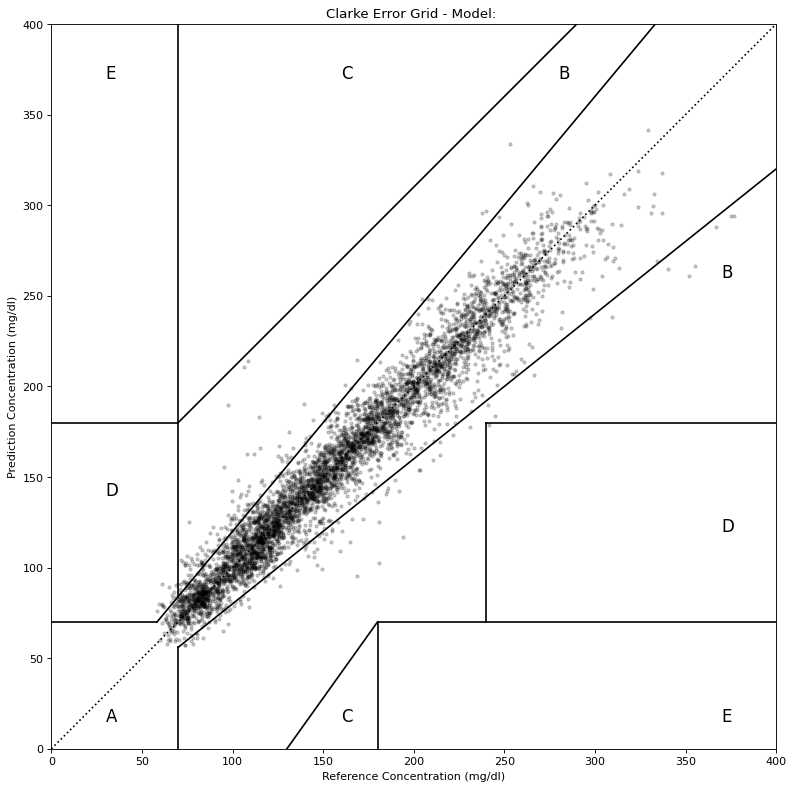

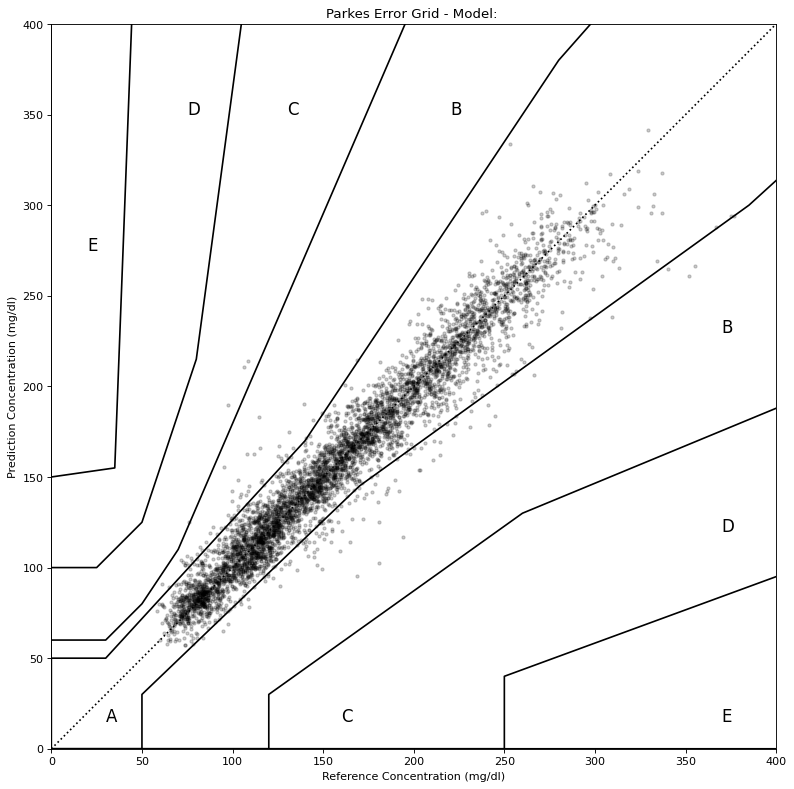

In [ ]:
# %% Evaluate model
# ---------------------------------------------------------------------
# EVALUATE THE MODEL
# ---------------------------------------------------------------------
evaluationConfiguration = {
    'distance': True,
    'hypo': True,
    'clarke': True,
    'parkes': True,
    'lag': True,
    'plotLag': True,
    'plotTimeseries': True
}
# ---------------------------------------------------------------------

evalObject = evaluateModel(data_obj, model)

import csv
if evaluationConfiguration['distance']:
    distance = evalObject.get_distanceAnalysis()
    w = csv.writer(open(model_figure_path / "distance.csv", "w"))
    for key, val in distance.items():
        w.writerow([key, val])

if evaluationConfiguration['hypo']:
    hypo = evalObject.get_hypoAnalysis()

if evaluationConfiguration['lag']:
    lag = evalObject.get_lagAnalysis(figure_path=model_figure_path)

if evaluationConfiguration['plotTimeseries']:
    evalObject.get_timeSeriesPlot(figure_path=model_figure_path)

if evaluationConfiguration['clarke']:
    clarkes, clarkes_prob = evalObject.clarkesErrorGrid(
        'mg/dl', figure_path=model_figure_path)

if evaluationConfiguration['parkes']:
    parkes, parkes_prob = evalObject.apply_parkes_error_grid(
        'mg/dl', figure_path=model_figure_path)


In [ ]:
    w = csv.writer(open(model_figure_path / "hypo.csv", "w"))
    for key, val in hypo.items():
        w.writerow([key, val])
